In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chicago-house-price/realest.csv


In [2]:
df = pd.read_csv("/kaggle/input/chicago-house-price/realest.csv")

df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


array([[<AxesSubplot: title={'center': 'Price'}>,
        <AxesSubplot: title={'center': 'Bedroom'}>,
        <AxesSubplot: title={'center': 'Space'}>],
       [<AxesSubplot: title={'center': 'Room'}>,
        <AxesSubplot: title={'center': 'Lot'}>,
        <AxesSubplot: title={'center': 'Tax'}>],
       [<AxesSubplot: title={'center': 'Bathroom'}>,
        <AxesSubplot: title={'center': 'Garage'}>,
        <AxesSubplot: title={'center': 'Condition'}>]], dtype=object)

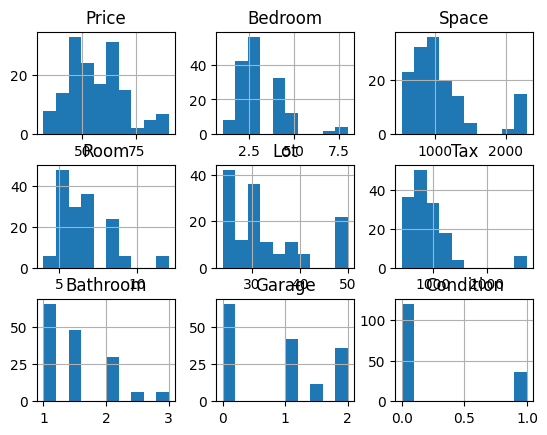

In [3]:
df.hist()

In [4]:
df.shape

(157, 9)

In [5]:
for col in df:
    print(col, df[col].isna().sum())

Price 1
Bedroom 1
Space 11
Room 1
Lot 11
Tax 10
Bathroom 1
Garage 1
Condition 1


In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(128, 9)

In [8]:
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


array([[<AxesSubplot: title={'center': 'Price'}>,
        <AxesSubplot: title={'center': 'Bedroom'}>,
        <AxesSubplot: title={'center': 'Space'}>],
       [<AxesSubplot: title={'center': 'Room'}>,
        <AxesSubplot: title={'center': 'Lot'}>,
        <AxesSubplot: title={'center': 'Tax'}>],
       [<AxesSubplot: title={'center': 'Bathroom'}>,
        <AxesSubplot: title={'center': 'Garage'}>,
        <AxesSubplot: title={'center': 'Condition'}>]], dtype=object)

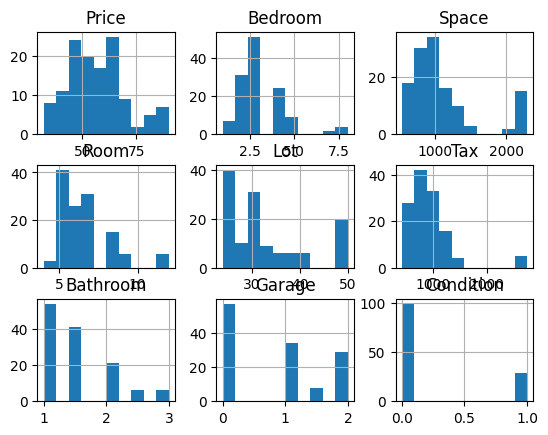

In [9]:
df.hist()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns != 'Condition'], df['Condition'], test_size=0.3)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# Apply Logistic Reg On Data Before PCA

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0).fit(X_train, y_train)

LR.score(X_test, y_test)

0.717948717948718

In [13]:
# Apply Decision Tree On Data Before PCA

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.9743589743589743

In [14]:
from sklearn.decomposition import PCA

for i in range(1, 9):
    
    pca = PCA(n_components = i)

    X_train_t = pca.fit_transform(X_train)
    X_test_t = pca.transform(X_test)

    explained_variance = pca.explained_variance_ratio_

    # Apply Logistic Reg On Data After PCA

    from sklearn.linear_model import LogisticRegression
    LR = LogisticRegression(random_state=0).fit(X_train_t, y_train)

    print(i, explained_variance, LR.score(X_test_t, y_test))

1 [0.56196041] 0.717948717948718
2 [0.56196041 0.16541343] 0.717948717948718
3 [0.56196041 0.16541343 0.09425325] 0.717948717948718
4 [0.56196041 0.16541343 0.09425325 0.07858185] 0.717948717948718
5 [0.56196041 0.16541343 0.09425325 0.07858185 0.04968733] 0.7435897435897436
6 [0.56196041 0.16541343 0.09425325 0.07858185 0.04968733 0.02557429] 0.6410256410256411
7 [0.56196041 0.16541343 0.09425325 0.07858185 0.04968733 0.02557429
 0.01630969] 0.717948717948718
8 [0.56196041 0.16541343 0.09425325 0.07858185 0.04968733 0.02557429
 0.01630969 0.00821976] 0.717948717948718


In [15]:
for i in range(1, 9):
    
    pca = PCA(n_components = i)

    X_train_t = pca.fit_transform(X_train)
    X_test_t = pca.transform(X_test)

    explained_variance = pca.explained_variance_ratio_

    # Apply Decision Tree On Data After PCA

    from sklearn import tree

    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train_t, y_train)

    print(i, explained_variance, clf.score(X_test_t, y_test))

1 [0.56196041] 0.7435897435897436
2 [0.56196041 0.16541343] 0.8717948717948718
3 [0.56196041 0.16541343 0.09425325] 0.9230769230769231
4 [0.56196041 0.16541343 0.09425325 0.07858185] 0.9230769230769231
5 [0.56196041 0.16541343 0.09425325 0.07858185 0.04968733] 0.8717948717948718
6 [0.56196041 0.16541343 0.09425325 0.07858185 0.04968733 0.02557429] 0.8717948717948718
7 [0.56196041 0.16541343 0.09425325 0.07858185 0.04968733 0.02557429
 0.01630969] 0.8205128205128205
8 [0.56196041 0.16541343 0.09425325 0.07858185 0.04968733 0.02557429
 0.01630969 0.00821976] 0.7948717948717948


In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.7948717948717948
